In [52]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt
import pandas as pd


In [55]:
#extra code not in assignment
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [37]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [38]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [39]:
results = []

In [40]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
Measurement = Base.classes.measurement
Station = Base.classes.station

june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [42]:
#  3. Convert the June temperatures to a list.
june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [60]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june, columns=["date", "June °F"])
june_df.set_index(df["date"], inplace=True)

june_df =df.sort_index()
print(june_df)

                  date  June °F
date                           
2010-06-01  2010-06-01     78.0
2010-06-01  2010-06-01     73.0
2010-06-01  2010-06-01     77.0
2010-06-01  2010-06-01     69.0
2010-06-01  2010-06-01     76.0
...                ...      ...
2017-06-30  2017-06-30     76.0
2017-06-30  2017-06-30     75.0
2017-06-30  2017-06-30     75.0
2017-06-30  2017-06-30     74.0
2017-06-30  2017-06-30     75.0

[1700 rows x 2 columns]


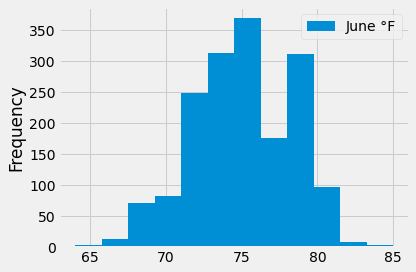

In [71]:
june_df.plot.hist(bins=12)
plt.tight_layout()

In [62]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June °F
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [63]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)

In [64]:
# 7. Convert the December temperatures to a list.
december = december.all()

In [67]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(december, columns=['date', 'December °F'])
dec_df.set_index(dec_df['date'], inplace=True)
dec_df=dec_df.sort_index()
print(dec_df)

                  date  December °F
date                               
2010-12-01  2010-12-01         76.0
2010-12-01  2010-12-01         73.0
2010-12-01  2010-12-01         72.0
2010-12-01  2010-12-01         78.0
2010-12-01  2010-12-01         72.0
...                ...          ...
2016-12-31  2016-12-31         67.0
2016-12-31  2016-12-31         72.0
2016-12-31  2016-12-31         66.0
2016-12-31  2016-12-31         71.0
2016-12-31  2016-12-31         65.0

[1517 rows x 2 columns]


In [68]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December °F
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


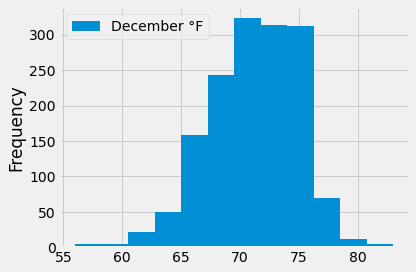

In [70]:
dec_df.plot.hist(bins=12)
plt.tight_layout()

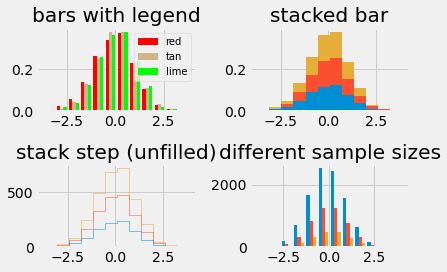

In [75]:

n_bins = 12
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

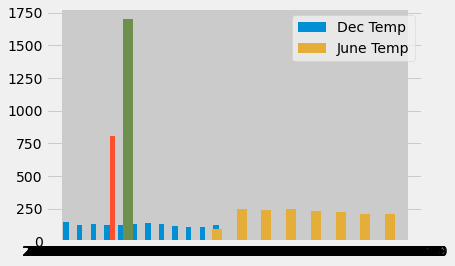

In [86]:
import numpy
from matplotlib import pyplot

x = dec_df
y = june_df

bins = 12

pyplot.hist(x, bins, label='Dec Temp')
pyplot.hist(y, bins, label='June Temp')
pyplot.legend(loc='upper right')
pyplot.show()

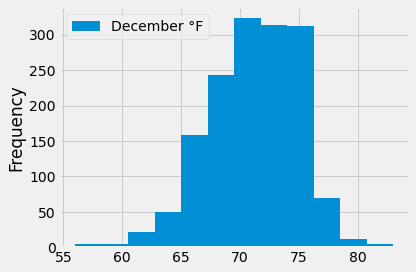

In [87]:
dec_df.plot.hist(bins=12)
plt.tight_layout()

In [93]:
fig = plt.hist(bins=12)

for frame in [june_df, dec_df]:
    plt.plot(frame)

plt.xlim(0,18000)
plt.ylim(0,30)
plt.show()

TypeError: hist() missing 1 required positional argument: 'x'